In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load train/test
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

train_df['text'] = train_df['Title'].astype(str) + " " + train_df['Description'].astype(str)
test_df['text'] = test_df['Title'].astype(str) + " " + test_df['Description'].astype(str)

X_train, y_train = train_df['text'], train_df['Class Index']
X_test, y_test = test_df['text'], test_df['Class Index']

# Build pipeline
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.95)),
    ("clf", LogisticRegression(max_iter=1000))
])

# Train
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [13]:
# Evaluate
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.91      0.92      1900
           2       0.95      0.98      0.97      1900
           3       0.89      0.89      0.89      1900
           4       0.90      0.91      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



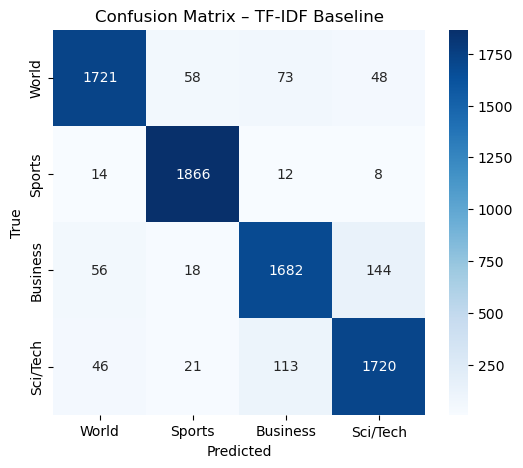

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["World","Sports","Business","Sci/Tech"],
            yticklabels=["World","Sports","Business","Sci/Tech"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – TF-IDF Baseline")
plt.show()